
*************************** Perceptron and Logistic Regression Linear Classifier ***************************


Total number of Data 569
Total number of training Data 398
Total number of testing Data 171 



C:\Users\amal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


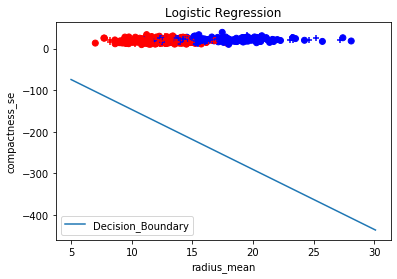

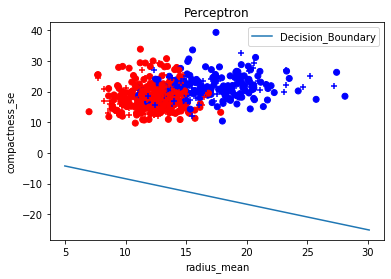


-------------------Report of the result for Perceptron-------------------

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       115
           1       1.00      0.62      0.77        56

    accuracy                           0.88       171
   macro avg       0.92      0.81      0.84       171
weighted avg       0.90      0.88      0.87       171


The accuracy for Perceptron = 87.71929824561403 %

The Mean Square error for Perceptron = 0.12280701754385964


-------------------Report of the result for Logistic Regression-------------------

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       115
           1       0.98      0.91      0.94        56

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171


The accuracy for Logistic = 96.49122807017544 %

The Mean Square error f

In [239]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



#1. Load the breast cancer Wisconsin dataset from CSV file.
dataset=pd.read_csv('C:/Users/amal/Desktop/CPCS433_Ass3_AMAL/data.csv')
dataset=dataset.iloc[:, :-1]
le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])
sc = StandardScaler()
#-----------------------------------------------------------------------------------------------------

#2.Divided the dataset randomly into testing and training with a splitting ration of (70:30).
dataset=dataset.sample(frac=1)           #generate a sample random data from the data frame
y = dataset['diagnosis']
X = dataset.drop(['id'],axis=1)
X = X.drop(['diagnosis'],axis=1)

training_X=X[:int(len(X)*0.7)] #70% of the dataset for the training
training_y=y[:int(len(y)*0.7)] #70% of the dataset for the training

testing_X=X[int(len(X)*0.7):]  #30% of the dataset for the testing
testing_y=y[int(len(y)*0.7):]  #30% of the dataset for the testing


print('\n*************************** Perceptron and Logistic Regression Linear Classifier ***************************\n\n')

print('Total number of Data',dataset.shape[0])
print('Total number of training Data',training_X.shape[0])
print('Total number of testing Data',testing_X.shape[0],'\n')


#-----------------------------------------------------------------------------------------------------

#3. Train the algorithms.
per=Perceptron()
fitted1=per.fit(training_X, training_y)
per_predict_y=per.predict(testing_X)

Log = LogisticRegression()
Log.fit(training_X, training_y)
Log_predict_y=Log.predict(testing_X)
#-----------------------------------------------------------------------------------------------------

#4. Estimate the decision boundary for each classifier.

#Estimate the Decision_Boundary for LogisticRegression
thetaLog=Log.coef_[0]
bLog=Log.intercept_[0]
plot_xLog = np.array([min(training_X.iloc[:,0]) - 2, max(training_X.iloc[:,0]) + 2])
plot_yLog = (-1/thetaLog[1]) * (thetaLog[0] * plot_xLog + bLog)

#Estimate the Decision_Boundary for Perceptron
thetaper=per.coef_[0]
bper=per.intercept_[0]
plot_xper = np.array([min(training_X.iloc[:,0]) - 2, max(training_X.iloc[:,0]) + 2])
plot_yper = (-1/thetaper[1]) * (thetaper[0] * plot_xper + bper)

#-----------------------------------------------------------------------------------------------------

#5. Plot the two classes in different colors, along with the decision boundary for each classifier.

colormap=np.array(['r','b'])

#plot the training data set
plt.scatter(training_X.iloc[:,0], training_X.iloc[:,1], marker='o', c=colormap[training_y])
#plot the test data set
plt.scatter(testing_X.iloc[:,0], testing_X.iloc[:,1], marker='+', c=colormap[testing_y])
#plot the Decision_Boundary for LogisticRegression
plt.plot(plot_xLog, plot_yLog, label = "Decision_Boundary")
plt.title('Logistic Regression')
plt.xlabel('radius_mean')
plt.ylabel('compactness_se')
plt.legend()
plt.show()

#//////////////////

#plot the training data set
plt.scatter(training_X.iloc[:,0], training_X.iloc[:,1], marker='o', c=colormap[training_y])
#plot the test data set
plt.scatter(testing_X.iloc[:,0], testing_X.iloc[:,1], marker='+', c=colormap[testing_y])
#plot the Decision_Boundary for Perceptron
plt.plot(plot_xper, plot_yper, label = "Decision_Boundary")
plt.title('Perceptron')
plt.xlabel('radius_mean')
plt.ylabel('compactness_se')
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------
#6. Report the results of each classifier. Which classifier performed better? Why?

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error 

print ('\n-------------------Report of the result for Perceptron-------------------\n')
print(classification_report(testing_y,per_predict_y))
print ('\nThe accuracy for Perceptron =',accuracy_score(testing_y,per_predict_y)*100,'%')
print ('\nThe Mean Square error for Perceptron =',mean_squared_error(testing_y,per_predict_y))


print ('\n\n-------------------Report of the result for Logistic Regression-------------------\n')
print(classification_report(testing_y,Log_predict_y))
print ('\nThe accuracy for Logistic =',accuracy_score(testing_y,Log_predict_y)*100,'%')
print ('\nThe Mean Square error for Perceptron =',mean_squared_error(testing_y,Log_predict_y))




print ('\n\n-------------------The better classifier-------------------\n')
if (accuracy_score(testing_y,per_predict_y)>accuracy_score(testing_y,Log_predict_y)):
    print ('\nThe Perceptron classifier performed better than Logistic Regression \n\n')
else:
    print ('\nThe Logistic Regression classifier performed better than Perceptron \n\n')


*************************** Perceptron and Logistic Regression Linear Classifier ***************************


Total number of Data 569
Total number of training Data 398
Total number of testing Data 171 



C:\Users\amal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


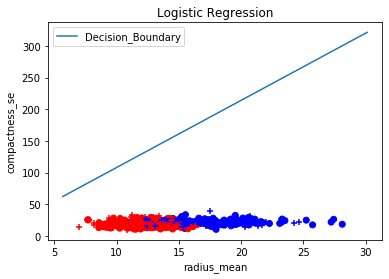

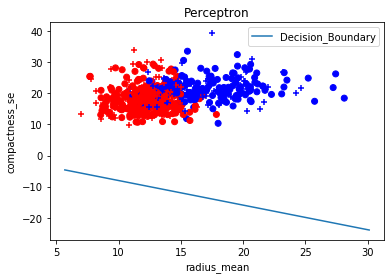


-------------------Report of the result for Perceptron-------------------

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       110
           1       0.83      0.93      0.88        61

    accuracy                           0.91       171
   macro avg       0.89      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171


The accuracy for Perceptron = 90.64327485380117 %

The Mean Square error for Perceptron = 0.0935672514619883


-------------------Report of the result for Logistic Regression-------------------

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       110
           1       0.92      0.89      0.90        61

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171


The accuracy for Logistic = 92.98245614035088 %

The Mean Square error fo